In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/amount")

In [0]:
from tensorflow.keras.models import load_model 
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np
import pandas as pd

In [0]:
model=load_model("./Model4_Alex.h5")
rootpath="/content/drive/My Drive/Colab Notebooks/amount/"
data=pd.read_csv(rootpath+"GTSRB/GT-final_test.csv",delimiter=";")

In [0]:
def readImage(path):
  # Read image
  image=plt.imread(path)
  # For reshaping to (40,40,1), pre-process image
  image=cv2.resize(image,(40,40))
  # Get black-white image
  image=rgb2gray(image)
  # Reshape for model
  image=image.reshape(-1,40,40,1)
  return image

In [0]:
images=[]
labels=[]
prefix = rootpath + "GTSRB/Final_Test/Images/" # subdirectory for class
filelist=os.listdir(prefix)

for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
  print("The %s file"%path)
  images.append(readImage(prefix+path))
  
  labels.append(clas.values[0])
  print(clas.values[0])



In [0]:
images=np.array(images).reshape(-1,40,40,1)
labels=np.array(labels).reshape(-1,1)

In [0]:
model.evaluate(images,labels)

12630/12630 [==============================] - 24s 2ms/sample - loss: 0.1952 - acc: 0.9512


[0.1951972587520783, 0.95122725]

## One Pixel

In [8]:
prefix = rootpath + "manipulated_images/One Pixel/" # subdirectory for class
filelist=os.listdir(prefix)
co=["Blur","One Pixel","Distort","Ripple","Rotate","SaltNppr"]
# Build up a matrix to mark which image has been perturbed successfully
success_list=pd.DataFrame(np.zeros(shape=(50,6)).astype(np.int),index=filelist,columns=co)
success_list

,Blur,One Pixel,Distort,Ripple,Rotate,SaltNppr
01193.ppm,0,0,0,0,0,0
01216.ppm,0,0,0,0,0,0
01469.ppm,0,0,0,0,0,0
01470.ppm,0,0,0,0,0,0
01738.ppm,0,0,0,0,0,0
02168.ppm,0,0,0,0,0,0
02352.ppm,0,0,0,0,0,0
02384.ppm,0,0,0,0,0,0
02604.ppm,0,0,0,0,0,0
00434.ppm,0,0,0,0,0,0


In [0]:
OneP_images=[]
OneP_labels=[]


for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
 
  OneP_images.append(readImage(prefix+path))
  y_pre=model.predict(readImage(prefix+path))
  
  if np.argmax(y_pre,axis=1)[0]!=clas.values[0]:
     
    success_list.loc[path,"One Pixel"]=1

  OneP_labels.append(clas.values[0])
  



In [10]:
OneP_images=np.array(OneP_images).reshape(-1,40,40,1)
OneP_labels=np.array(OneP_labels).reshape(-1,1)
model.evaluate(OneP_images,OneP_labels)

50/50 [==============================] - 0s 3ms/sample - loss: 0.1143 - acc: 0.9400


[0.11425543665885925, 0.94]

## Blur

In [11]:
prefix = rootpath + "manipulated_images/Blur/" # subdirectory for class
filelist=os.listdir(prefix)
Blur_images=[]
Blur_labels=[]


for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
 
  Blur_images.append(readImage(prefix+path))
  y_pre=model.predict(readImage(prefix+path))
  
  if np.argmax(y_pre,axis=1)[0]!=clas.values[0]:
     
    success_list.loc[path,"Blur"]=1

  Blur_labels.append(clas.values[0])

Blur_images=np.array(Blur_images).reshape(-1,40,40,1)
Blur_labels=np.array(Blur_labels).reshape(-1,1)
model.evaluate(Blur_images,Blur_labels)
  

50/50 [==============================] - 0s 2ms/sample - loss: 0.8157 - acc: 0.7600


[0.8156986379623413, 0.76]

## Distort

In [12]:
prefix = rootpath + "manipulated_images/Distort/" # subdirectory for class
filelist=os.listdir(prefix)
Distort_images=[]
Distort_labels=[]


for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
 
  Distort_images.append(readImage(prefix+path))
  y_pre=model.predict(readImage(prefix+path))
  
  if np.argmax(y_pre,axis=1)[0]!=clas.values[0]:
     
    success_list.loc[path,"Distort"]=1

  Distort_labels.append(clas.values[0])

Distort_images=np.array(Distort_images).reshape(-1,40,40,1)
Distort_labels=np.array(Distort_labels).reshape(-1,1)
model.evaluate(Distort_images,Distort_labels)

50/50 [==============================] - 0s 2ms/sample - loss: 0.6735 - acc: 0.8400


[0.6734876942634582, 0.84]

## Ripple

In [13]:
prefix = rootpath + "manipulated_images/Ripple/" # subdirectory for class
filelist=os.listdir(prefix)
Ripple_images=[]
Ripple_labels=[]


for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
 
  Ripple_images.append(readImage(prefix+path))
  y_pre=model.predict(readImage(prefix+path))
  
  if np.argmax(y_pre,axis=1)[0]!=clas.values[0]:
     
    success_list.loc[path,"Ripple"]=1

  Ripple_labels.append(clas.values[0])

Ripple_images=np.array(Ripple_images).reshape(-1,40,40,1)
Ripple_labels=np.array(Ripple_labels).reshape(-1,1)
model.evaluate(Ripple_images,Ripple_labels)

50/50 [==============================] - 0s 2ms/sample - loss: 826.8047 - acc: 0.0200


[826.8046875, 0.02]

## Rotate

In [14]:
prefix = rootpath + "manipulated_images/Rotate/" # subdirectory for class
filelist=os.listdir(prefix)
Rotate_images=[]
Rotate_labels=[]


for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
 
  Rotate_images.append(readImage(prefix+path))
  y_pre=model.predict(readImage(prefix+path))
  
  if np.argmax(y_pre,axis=1)[0]!=clas.values[0]:
    
    success_list.loc[path,"Rotate"]=1

  Rotate_labels.append(clas.values[0])

Rotate_images=np.array(Rotate_images).reshape(-1,40,40,1)
Rotate_labels=np.array(Rotate_labels).reshape(-1,1)
model.evaluate(Rotate_images,Rotate_labels)

50/50 [==============================] - 0s 2ms/sample - loss: 0.6461 - acc: 0.8600


[0.6461377334594727, 0.86]

## Salt Nppr

In [15]:
prefix = rootpath + "manipulated_images/SaltNppr/" # subdirectory for class
filelist=os.listdir(prefix)
saltNppr_images=[]
saltNppr_labels=[]


for path in filelist:
  # Find class for each image
  clas=data[data["Filename"]==path]["ClassId"]
  if len(clas)==0:
    continue
 
  saltNppr_images.append(readImage(prefix+path))
  y_pre=model.predict(readImage(prefix+path))
  
  if np.argmax(y_pre,axis=1)[0]!=clas.values[0]:
    
    success_list.loc[path,"SaltNppr"]=1

  saltNppr_labels.append(clas.values[0])

saltNppr_images=np.array(saltNppr_images).reshape(-1,40,40,1)
saltNppr_labels=np.array(saltNppr_labels).reshape(-1,1)
model.evaluate(saltNppr_images,saltNppr_labels)

50/50 [==============================] - 0s 2ms/sample - loss: 2.2235 - acc: 0.6600


[2.2234799575805666, 0.66]

In [16]:
success_list

,Blur,One Pixel,Distort,Ripple,Rotate,SaltNppr
01193.ppm,0,0,0,1,0,0
01216.ppm,0,0,0,0,0,0
01469.ppm,0,0,1,1,0,0
01470.ppm,0,0,0,1,0,0
01738.ppm,1,0,0,1,0,0
02168.ppm,0,0,0,1,0,0
02352.ppm,1,0,1,1,0,0
02384.ppm,0,0,0,1,0,0
02604.ppm,1,0,0,1,0,1
00434.ppm,0,0,0,1,0,0


In [17]:
data=success_list[success_list["One Pixel"]==1]
c_file=list(data["One Pixel"].index)
data

,Blur,One Pixel,Distort,Ripple,Rotate,SaltNppr
03566.ppm,1,1,1,1,1,1
05967.ppm,1,1,1,1,0,1
12558.ppm,0,1,1,1,1,1


In [0]:
co.remove("Ripple")

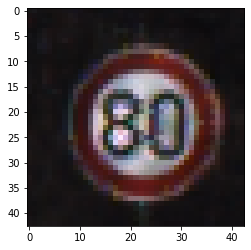

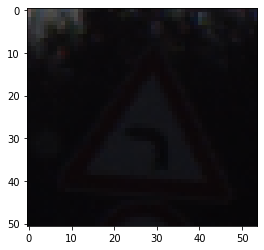

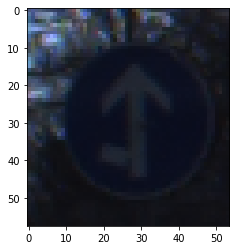

In [27]:
prefix = rootpath + "GTSRB/Final_Test/Images/"

for i in c_file:
  # The original image which has been successfully perturbed
  ori_image=plt.imread(prefix+i)
  plt.imshow(ori_image)
  plt.show()
  for j in co:
    if data.loc[i,j]==1:
      alt_path=rootpath+"manipulated_images/"+j+"/"
      alt_image=plt.imread(alt_path+i)
      # Count amount of perturbation
      data.loc[i,j]=abs(alt_image-ori_image).sum()      

In [0]:
for i in c_file:
  ori_image=plt.imread(prefix+i)
  alt_image=plt.imread(rootpath+"manipulated_images/Ripple/"+i)
  ori_image=abs(ori_image.sum(axis=2))
  # Count amount of perturbation for Ripple
  data.loc[i,"Ripple"]=abs(ori_image-alt_image).sum()
  

In [0]:
data[data==0]=np.nan

## Final amount of minimum perturbation

In [25]:
data

,Blur,One Pixel,Distort,Ripple,Rotate,SaltNppr
03566.ppm,477100.0,353,30690,196935,719247.0,231888
05967.ppm,659567.0,733,24481,92994,NaN,306891
12558.ppm,NaN,707,20134,257074,1166452.0,460034
